# Tensorflow Image Classification with Fashion MNIST Dataset

## Imports

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

In [44]:
(x_train, y_train), (x_test, y_test) = data.load_data()
#loading the data into train and test sets

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


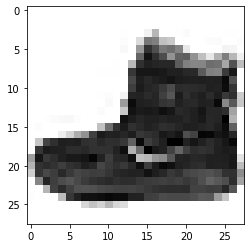

In [47]:
# preprocess the image data to have a pixel value between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

#looking at an image
%matplotlib inline
plt.imshow(x_train[0], cmap='binary')
plt.show()

In [48]:
y_train[0] #this is the label attached to the image, saying that the image corresponds to a value of 5

9

## Create the model
The model itself will have two hidden layers; notice the use of ReLU and softmax as activation functions

In [51]:
import tensorflow.keras.models
import tensorflow.keras.layers

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [52]:
# model.compile(
#     optimizer='sgd', #stochastic gradient descent
#     loss='categorical_crossentropy', metrics=['accuracy']
#     #here, categorical cross entropy is used to qualify the difference between two distributions
# )
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [56]:
model.fit(x_train, y_train, batch_size = 16, epochs=10)

Epoch 1/10
3750/3750 [==============================] - 21s 5ms/step - loss: 0.4777 - accuracy: 0.8268
Epoch 2/10
3750/3750 [==============================] - 17s 5ms/step - loss: 0.3638 - accuracy: 0.8678
Epoch 3/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.3266 - accuracy: 0.8797
Epoch 4/10
3750/3750 [==============================] - 25s 7ms/step - loss: 0.3064 - accuracy: 0.8859
Epoch 5/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2890 - accuracy: 0.8917
Epoch 6/10
3750/3750 [==============================] - 21s 6ms/step - loss: 0.2751 - accuracy: 0.8968
Epoch 7/10
3750/3750 [==============================] - 19s 5ms/step - loss: 0.2616 - accuracy: 0.9011
Epoch 8/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2541 - accuracy: 0.9044
Epoch 9/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2440 - accuracy: 0.9078
Epoch 10/10
3750/3750 [==============================] - 17s 5ms/step - l

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy %:', test_acc*100)


313/313 - 1s - loss: 0.3339 - accuracy: 0.8848 - 600ms/epoch - 2ms/step

Test accuracy %: 88.48000168800354


In [59]:
preds = model.predict(x_test)
print(preds.shape)

(10000, 10)


## Showing values

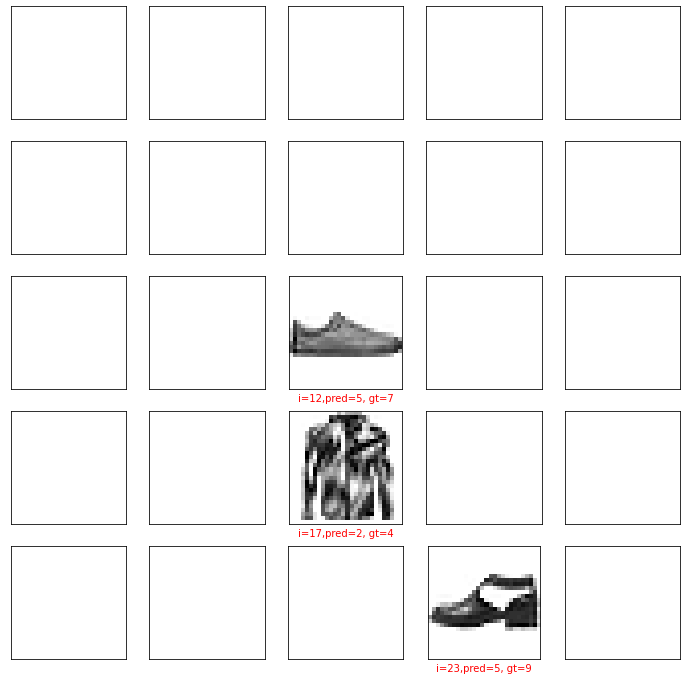

In [63]:
plt.figure(figsize=(12, 12)) 
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1) 
    plt.grid(False) 
    plt.xticks([]) 
    plt.yticks([])
    pred = np.argmax(preds[start_index+i]) 
    gt = y_test[start_index+i]
    col = 'b' 
    if pred != gt:
        col = 'r'
        plt.xlabel('i={},pred={}, gt={}'.format(start_index+i, pred, gt), color = col)
        plt.imshow(x_test[start_index+i], cmap= 'binary') 
plt.show()

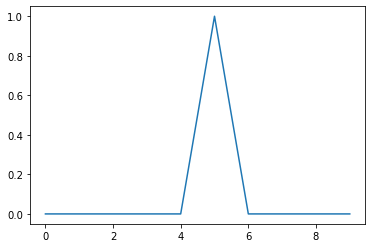

In [61]:
plt.plot(preds[8])